In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the file

path ="E:\Backup\Project\Machine Learning\Digital Image Processing\\"
h5f = h5py.File(path+'SVHN_single_grey1.h5','r')

# load the train and test data
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

# close the file
h5f.close()

In [3]:
X_train.shape,y_train.shape

((42000, 32, 32), (42000,))

In [4]:
X_test.shape,y_test.shape

((18000, 32, 32), (18000,))

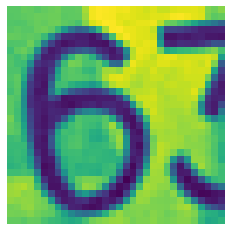


 Tags attached to above images are as follows:
 6


In [5]:
plt.imshow(X_train[1])
plt.axis('off')
plt.show()
print('\n Tags attached to above images are as follows:\n',y_train[1])

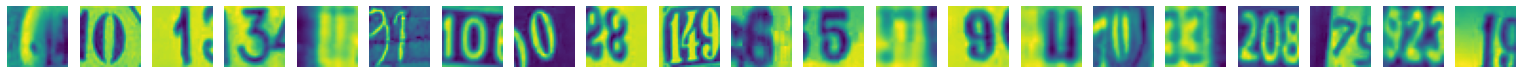


 Tags attached to above images are as follows:
 [1 0 1 3 1 1 0 0 8 4 6 5 7 9 1 0 3 0 7 2 1]


In [6]:
plt.figure(figsize=(40,40))

for i in range(10,31):
    plt.subplot(10,31,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()
print('\n Tags attached to above images are as follows:\n',y_train[10:31])

# Neural network
    - 1st layer = 32 x 32,hidden= 400, relu
    - dropout
    - Batch Normalization
    - 2nd layer = 400, relu
    - dropout
    - Batch Normalization
    - 3rd layer = 200, relu
    - dropout
    - Batch Normalization
    - 4th layer = 100, relu
    - dropout
    - Batch Normalization
    - 5th layer = 25, relu
    - dropout
    - Batch Normalization
    - 5th layer = 10, softmax

In [7]:
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

In [8]:
# Reshaping X data: (n,28,28) => (n,784)
X_train = X_train.reshape((X_train.shape[0],-1)) # reduce 1 dimesion -> nn cant recog 3 dimension
X_test = X_test.reshape((X_test.shape[0],-1))

In [9]:
# Converting y data into categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
X_train.shape,y_train.shape

((42000, 1024), (42000, 10))

In [11]:
X_test.shape,y_test.shape

((18000, 1024), (18000, 10))

In [12]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization, Dropout

In [13]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50,input_shape=(1024,),kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
#     model.add(Dropout(0.2)) # some number of layer outputs are randomly ignored or "dropped out".
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
#     model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
#     model.add(Dropout(0.2))
    model.add(Dense(50,))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
#     model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr=0.001)
    model.compile(optimizer=sgd, loss = 'categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [14]:
# model = mlp_model()
# history = model.fit(X_train,y_train,batch_size=200,epochs=500,verbose=1)

In [15]:
# result = model.evaluate(X_test,y_test)

In [16]:
# print('Test accuracy: ',result[1])

In [17]:
# # saving the model for later
# fer_json = model.to_json()
# with open('svhn.json','w') as json_file:
#     json_file.write(fer_json)
# model.save_weights("svhn.h5")

# Test with new data

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import model_from_json
import cv2

In [19]:
model = model_from_json(open('svhn.json','r').read())
model.load_weights('svhn.h5')

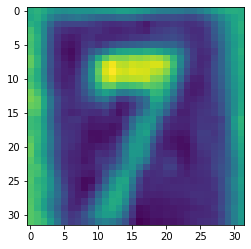

(32, 32)
(1024,)


In [20]:
use_samples = [2]
samples_to_predict = []

# Generate plots for samples
for sample in use_samples:
  # Generate a plot
  reshaped_image = X_train[sample].reshape((32, 32))
  plt.imshow(reshaped_image)
  plt.show()
  print(reshaped_image.shape)
  # Add sample to array for prediction
  samples_to_predict.append(X_train[sample])
  print(X_train[sample].shape)

In [21]:
# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)
predictions = model.predict(samples_to_predict)
classes = np.argmax(predictions, axis = 1)
print('predict digits : ',classes)

(1, 1024)
predict digits :  [7]


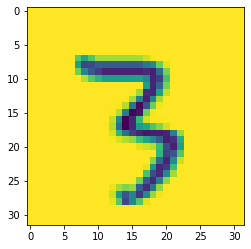

(32, 32)
(1024,)


In [22]:
sample_image = cv2.imread('test.png')
sample_image = cv2.cvtColor(sample_image,cv2.COLOR_BGR2GRAY)
sample_image = cv2.resize(sample_image,(32,32))
# A few random samples
samples_to_predict = []

# Generate a plot
reshaped_image = sample_image.flatten()
plt.imshow(sample_image)
plt.show()
print(sample_image.shape)
# Add sample to array for prediction
samples_to_predict.append(reshaped_image)
print(reshaped_image.shape)

In [23]:
# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)
predictions = model.predict(samples_to_predict)
classes = np.argmax(predictions, axis = 1)
print('predict digits : ',classes)

(1, 1024)
predict digits :  [3]
